In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_frame = pd.read_csv('DataForAnalysis\data_for_lr.csv')

In [4]:
data_frame.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [7]:
fillna_df = data_frame['y'].fillna(value=49.939869)

In [8]:
filled_df = pd.DataFrame(fillna_df)

In [9]:
df = data_frame.assign(y=filled_df['y'])

In [10]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [11]:
train_input = np.array(df.iloc[0:500, 0]).reshape(500, 1)
test_input = np.array(df.iloc[500:, 0]).reshape(200, 1)
train_output = np.array(df.iloc[0:500, 1]).reshape(500, 1)
test_output = np.array(df.iloc[500:, 1]).reshape(200, 1)

In [12]:
# prediction, y = mx + c
def forward_propagation(train_input, parameters):
    m = parameters['m']
    c = parameters['c']
    predictions = np.multiply(m, train_input) + c
    return predictions

In [13]:
# cost = ((prediction - original_train_output)**2)/(2*n)
def cost_function(predictions, train_output):
    cost = np.mean((train_output - predictions) ** 2) * 0.5
    return cost

In [14]:
# derivatives -( dm = (df*train_input)/n) ; where, df = (prediction - train_output)
# dc = df/n
def backward_propagation( predictions, train_input, train_output ):
    derivatives = dict()
    df = (train_output - predictions) * -1
    dm = np.mean(np.multiply(train_input, df))
    dc = np.mean(df)
    derivatives['dm'] = dm
    derivatives['dc'] = dc
    return derivatives

In [15]:
def update_parameters(parameters, derivatives, learning_rate):
    parameters['m'] = parameters['m'] - learning_rate * derivatives['dm']
    parameters['c'] = parameters['c'] - learning_rate * derivatives['dc']
    return parameters

In [22]:
def training_function(train_input, train_output):
    parameters = {'m': np.random.uniform(0, 1), 'c': np.random.uniform(0, 1)}
    learning_rate = 0.001
    loss = []
    
    plt.figure()
    
    for i in range(50):
    
        predictions = forward_propagation(train_input, parameters)

        cost = cost_function(predictions, train_output)
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')
        ax.set_xlim([ 0, 250])
        ax.set_ylim([-5, 120])

        legend = ax.legend()
        
#         plt.plot(train_input, train_output, '+')
#         plt.plot(train_input, predictions, '*')        
        
        plt.show()

        derivatives = backward_propagation(predictions, train_input, train_output)

        parameters = update_parameters(parameters, derivatives, learning_rate)

    return predictions, cost, derivatives, parameters

Iteration = 1, Loss = 4477.843608956366


<Figure size 432x288 with 0 Axes>

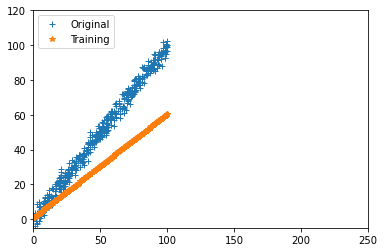

Iteration = 2, Loss = 2302428.509815058


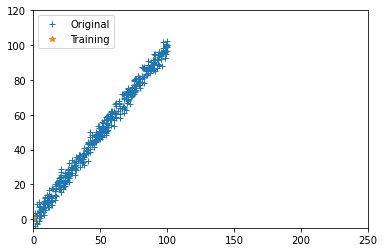

Iteration = 3, Loss = 1698525788.9891303


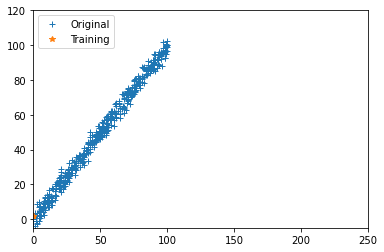

Iteration = 4, Loss = 1253758286410.279


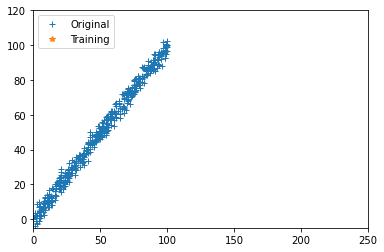

Iteration = 5, Loss = 925456124038745.0


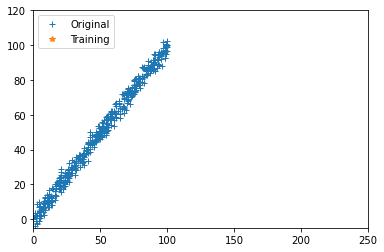

Iteration = 6, Loss = 6.831213382416908e+17


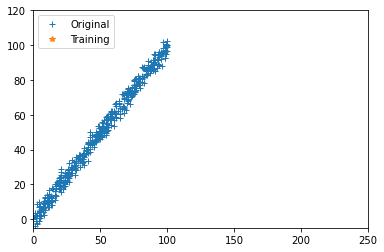

Iteration = 7, Loss = 5.0424298963552266e+20


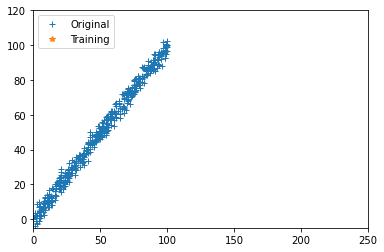

Iteration = 8, Loss = 3.722047290325039e+23


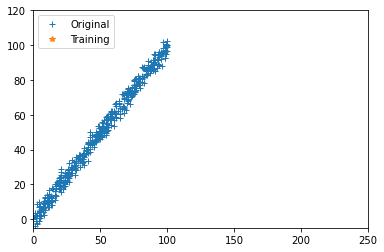

Iteration = 9, Loss = 2.74741271890159e+26


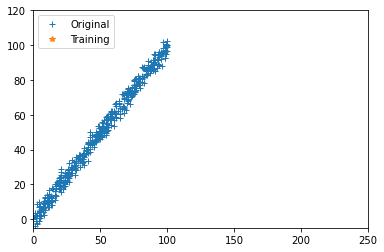

Iteration = 10, Loss = 2.0279905275795277e+29


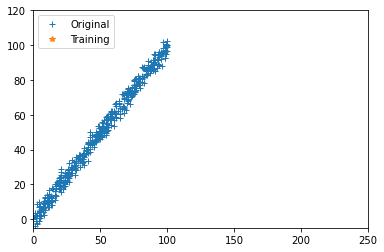

Iteration = 11, Loss = 1.4969522240533827e+32


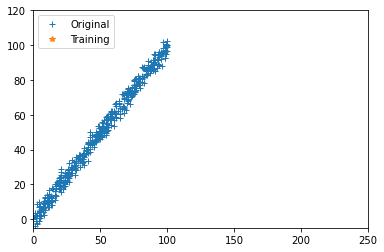

Iteration = 12, Loss = 1.1049686527741918e+35


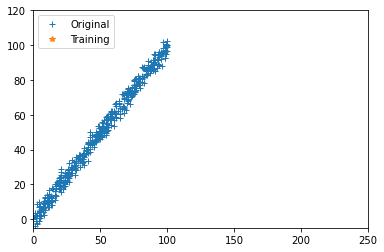

Iteration = 13, Loss = 8.156277160987541e+37


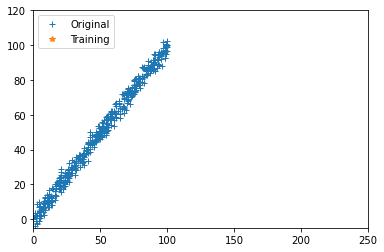

Iteration = 14, Loss = 6.020519854552094e+40


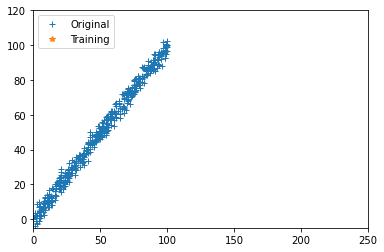

Iteration = 15, Loss = 4.4440200600867384e+43


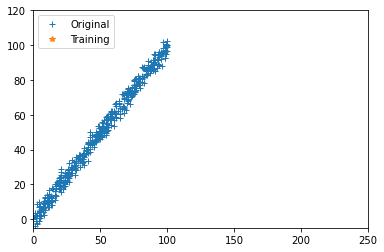

Iteration = 16, Loss = 3.280333720604038e+46


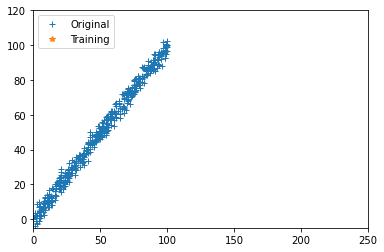

Iteration = 17, Loss = 2.421363804177314e+49


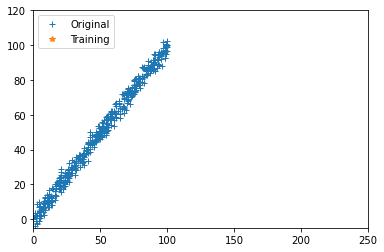

Iteration = 18, Loss = 1.7873189655534289e+52


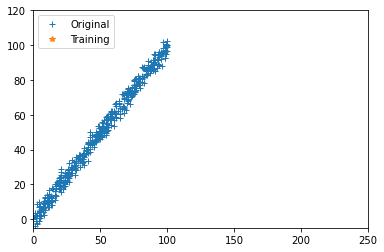

Iteration = 19, Loss = 1.3193015767047645e+55


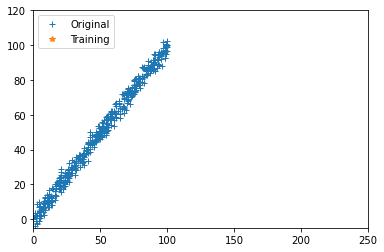

Iteration = 20, Loss = 9.738366144157881e+57


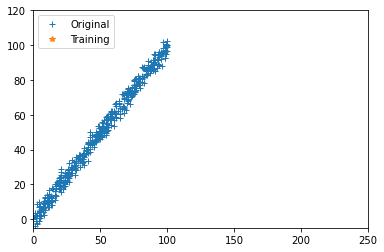

Iteration = 21, Loss = 7.188331828917595e+60


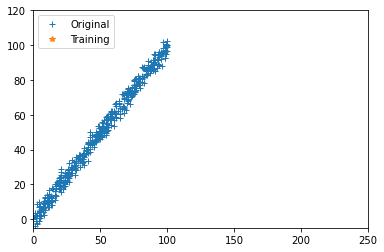

Iteration = 22, Loss = 5.30603529562588e+63


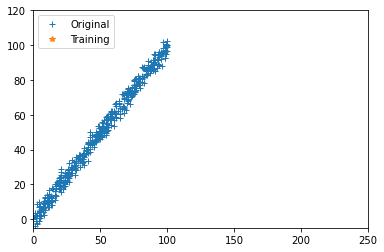

Iteration = 23, Loss = 3.916626448040168e+66


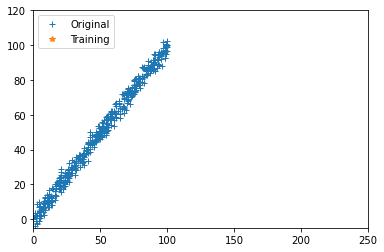

Iteration = 24, Loss = 2.8910404621947226e+69


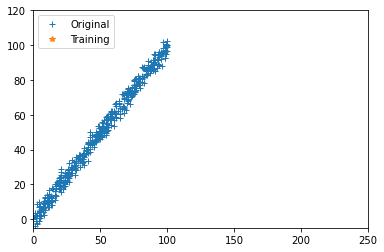

Iteration = 25, Loss = 2.134008710028851e+72


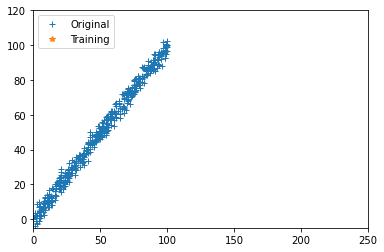

Iteration = 26, Loss = 1.5752090757740027e+75


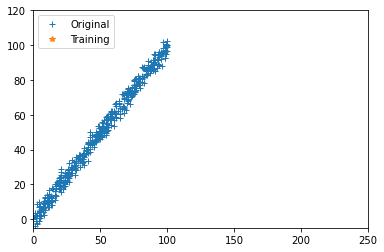

Iteration = 27, Loss = 1.1627336011984897e+78


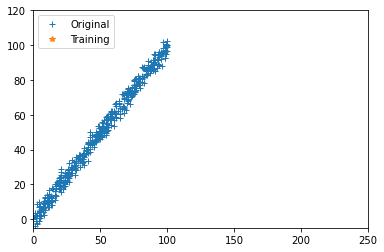

Iteration = 28, Loss = 8.582666568828058e+80


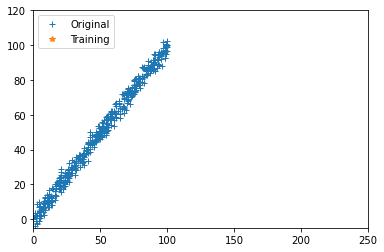

Iteration = 29, Loss = 6.335257307069429e+83


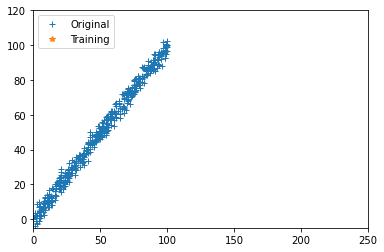

Iteration = 30, Loss = 4.676342116393899e+86


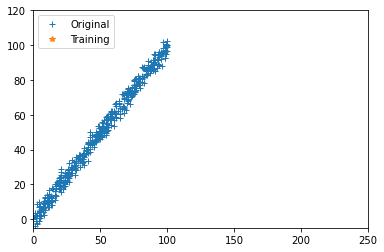

Iteration = 31, Loss = 3.4518212172940435e+89


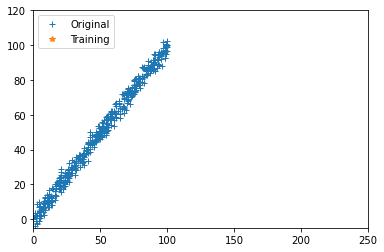

Iteration = 32, Loss = 2.547946540179461e+92


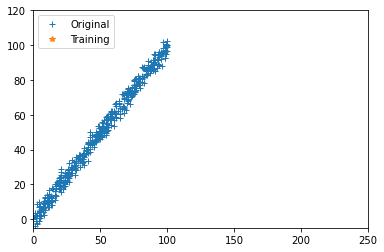

Iteration = 33, Loss = 1.880755451379295e+95


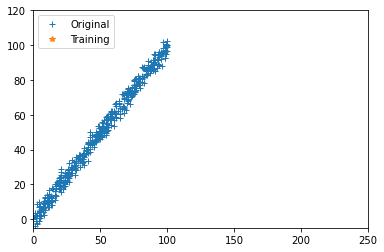

Iteration = 34, Loss = 1.3882713047989592e+98


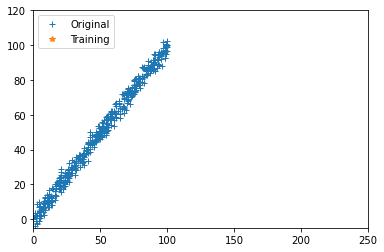

Iteration = 35, Loss = 1.0247463136766549e+101


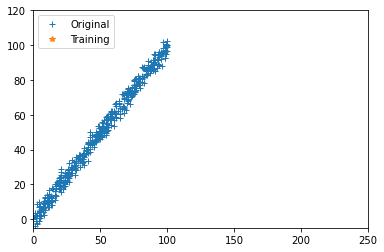

Iteration = 36, Loss = 7.564119518741785e+103


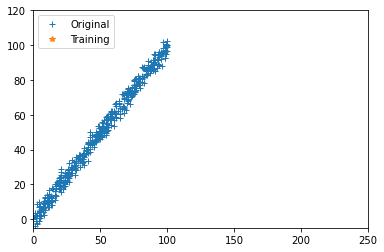

Iteration = 37, Loss = 5.583421314152111e+106


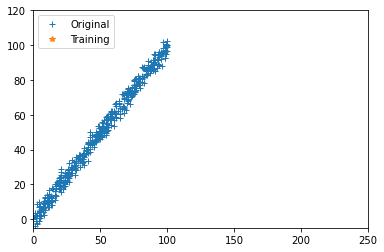

Iteration = 38, Loss = 4.121377708811468e+109


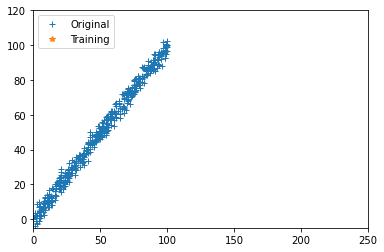

Iteration = 39, Loss = 3.0421766982969456e+112


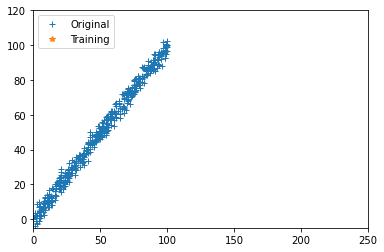

Iteration = 40, Loss = 2.2455692531830174e+115


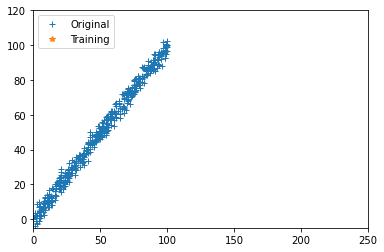

Iteration = 41, Loss = 1.6575569964965702e+118


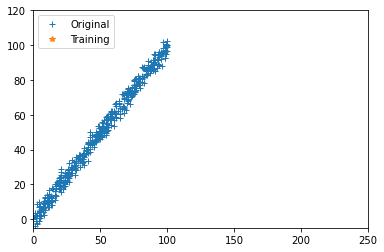

Iteration = 42, Loss = 1.223518354083379e+121


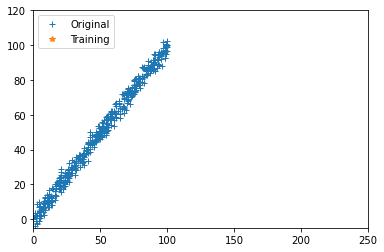

Iteration = 43, Loss = 9.031346529518864e+123


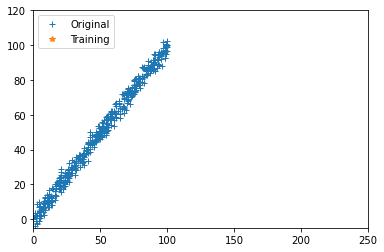

Iteration = 44, Loss = 6.666448432427363e+126


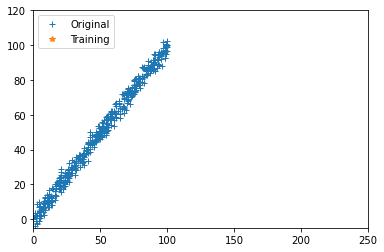

Iteration = 45, Loss = 4.920809378419547e+129


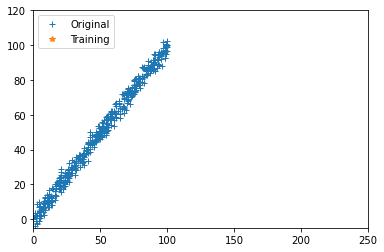

Iteration = 46, Loss = 3.6322736437825985e+132


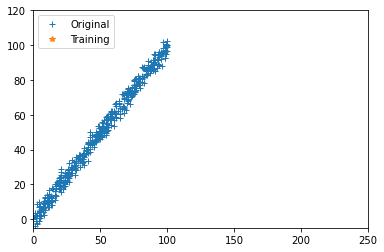

Iteration = 47, Loss = 2.681146699398293e+135


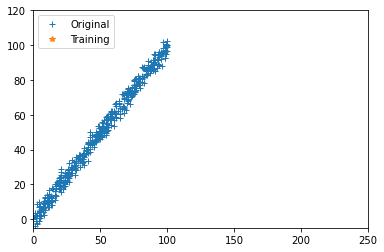

Iteration = 48, Loss = 1.9790765588377598e+138


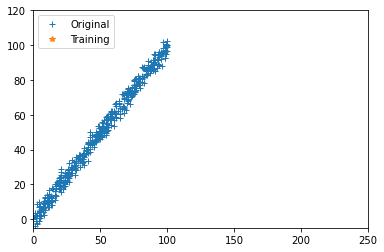

Iteration = 49, Loss = 1.4608465947126687e+141


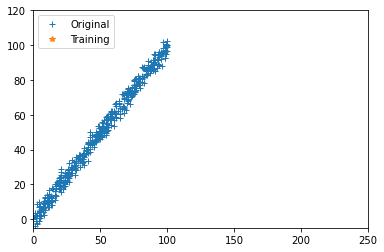

Iteration = 50, Loss = 1.0783174424221687e+144


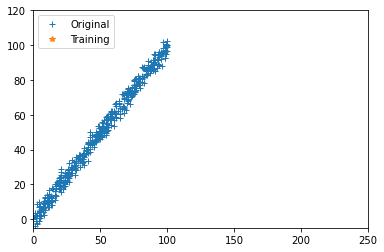

In [23]:
predictions, cost, derivatives, parameters = training_function(train_input, train_output)

In [40]:
parameters

{'m': -9.168903396312784, 'c': 0.6288394300885018}

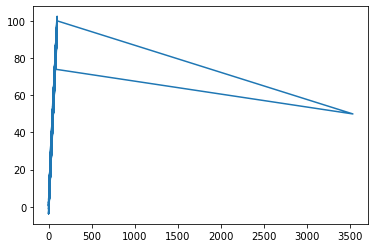

In [60]:
plt.plot(train_input, train_output)

In [6]:
df_for_gd = pd.read_csv('DataForAnalysis\gradient_descent.csv')

In [7]:
df_for_gd.head()

,"Marketing Spend,Administration,Transport,Area,Profit"
0,"114523.61,136897.8,471784.1,Dhaka,192261.83"
1,"162597.7,151377.59,443898.53,Ctg,191792.06"
2,"153441.51,101145.55,407934.54,Rangpur,191050.39"
3,"144372.41,118671.85,383199.62,Dhaka,182901.99"
4,"142107.34,91391.77,366168.42,Rangpur,166187.94"


In [8]:
df_for_gd.shape

(50, 1)

In [9]:
df_for_gd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0   Marketing Spend,Administration,Transport,Area,Profit  50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes
